## Observations and Insights 

* According to the information obtained on the summary statistics table, the standard deviation for the tumor volume     grouped by a drug is high, which means there is significant variability in the data points.  
  An important fact that could interfere with this result is the variable timepoint.  This variable includes the         different stages of the treatments and the volume tumor for that time. These treatments aim to alter the tumor         volume through time, which implies variability in the data.  Therefore, it will be crucial to split the data based     on the time points to obtain the central tendency measures more and a more accurate standard deviation of the data.
  
  
  
* The relation between the mouse weight and the tumor volume is strong, base on the correlation total of 0.84. It       means that the mouse's weight has a high impact on the behavior of the tumor volume. This impact is positive; that     is to say, if the mouse weight increases, the tumor volume will be higher and vice-versa.  
  Due to the high correlation between these variables, the mouse's weight became crucial for the success of the         treatment. 
  
  
* Based on the boxplot for Capomulin, Ramicane, Infubinol, and Ceftamin filter by the lastest timepoint, it is           appropriate to infer that the results provided by Ceftamin treatment were more similar among them than the results     for    the rest of the treatments. 
  This assumption is based on the lower and upper bound levels since these are very close to the lower and upper         quartiles. In the rest of the treatment, the bound's length is longer, which implies a more significant diversity in   the results.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Create a copy of the data frame
merge_df_copy = merge_df.copy()

In [3]:
# Checking the number of mice.
len(merge_df_copy["Mouse ID"].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merge_df_copy[merge_df_copy.duplicated()]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
merge_df_copy.loc[merge_df_copy["Mouse ID"]== "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df_copy = merge_df_copy.drop(merge_df.loc[merge_df["Mouse ID"]== "g989"].index)

In [7]:
# Checking the number of mice in the clean DataFrame.
len(merge_df_copy["Mouse ID"].value_counts())

248

## Summary Statistics

- Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
- Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
   - mean, median, variance, standard deviation, and SEM of the tumor volume. 
- Assemble the resulting series into a single summary dataframe.

In [8]:
# Group the data by drugs regimen
dregimen_groups = merge_df_copy.groupby("Drug Regimen")

In [9]:
# Mean tumor volume
mean_volume = dregimen_groups["Tumor Volume (mm3)"].mean()

In [10]:
# Median tumor volume
median_volume = dregimen_groups["Tumor Volume (mm3)"].median()

In [11]:
# Variance tumor volume
variance_volume = dregimen_groups["Tumor Volume (mm3)"].var()

In [12]:
# Standard deviation tumor volume
std_dev_volume = dregimen_groups["Tumor Volume (mm3)"].std()

In [13]:
# Standard error tumor volume
std_err_volume = dregimen_groups["Tumor Volume (mm3)"].sem()

In [14]:
# Create a data frame to store the information

summary_tumor_volume = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                                    "Median Tumor Volume": median_volume,
                                    "Tumor Volume Variance": variance_volume,
                                    "Tumor Volume Std. Dev.": std_dev_volume,
                                    "Tumor Volume Std. Err": std_err_volume})
# Display the data frame
summary_tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


- Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [15]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_volume = dregimen_groups["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_volume

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

- Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

In [16]:
# Filter the DataFrame down only on to those columsn to chart
drug_groups = merge_df_copy.groupby("Drug Regimen")

In [17]:
# Create a variable to store the total number of unique mice tested on each drug regimen 
mousetotal_drug = drug_groups["Mouse ID"].count().sort_values(ascending=False)

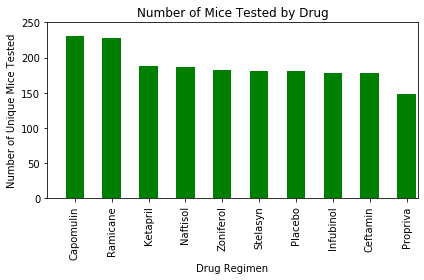

In [18]:
# Create the chart and customize it
drug_chart = mousetotal_drug.plot(kind = "bar", color = "g")
plt.ylabel("Number of Unique Mice Tested")
plt.title("Number of Mice Tested by Drug")
plt.xlim(-0.75, 9.3)
plt.ylim(0, 250)
plt.tight_layout()


- Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

In [19]:
# Create a range based on the number of drugs
x_axis = np.arange(len(merge_df_copy["Drug Regimen"].unique()))
tick_locations = [value for value in x_axis]

# Pull the drug names
drug_name= mousetotal_drug.index

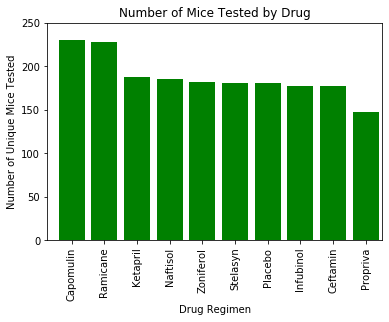

In [20]:
# Create the chart
plt.bar(x_axis, mousetotal_drug, color='g', align="center")
plt.xticks(tick_locations, drug_name, rotation="vertical" )
plt.title("Number of Mice Tested by Drug")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")
plt.xlim(-0.75, 9.5)
plt.ylim(0, 250)
plt.show()

- Generate a pie plot showing the distribution of female versus male mice using pandas

In [21]:
# Group the df by "Sex"
gender_group = merge_df_copy.groupby("Sex")

In [22]:
# Obtain the total items for each gender
gender_distribution = gender_group["Sex"].count().sort_values(ascending=False)

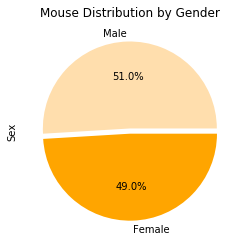

In [23]:
# Create the gender pie

colors = ['navajowhite', 'orange']
explode = [0.03, 0.03]
gender_pie = gender_distribution.plot(kind="pie", autopct='%1.1f%%', colors=colors, explode = explode, title = "Mouse Distribution by Gender")

- Generate a pie plot showing the distribution of female versus male mice using pyplot

In [24]:
# Create the labels
labels = gender_distribution.index

Text(0.5, 1.0, 'Mouse Distribution by Gender')

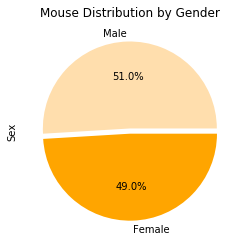

In [25]:
# Create the chart
plt.pie(gender_distribution, labels=labels, autopct="%1.1f%%", colors=colors, explode=explode)
plt.ylabel("Sex")
plt.title("Mouse Distribution by Gender")

## Quartiles, Outliers and Boxplots

* Calculate the final tumor volume of each mouse across four of the treatment regimens:  

   * Capomulin, Ramicane, Infubinol, and Ceftamin

In [27]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(dregimen_groups["Timepoint"].max())

In [28]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_volume = pd.merge(merge_df_copy, max_timepoint, on="Timepoint", how="right")

# Obtain the data only for Capomulin, Ramicane, Infubinol, and Ceftamin

filter_merge_volume  = merge_volume.loc[(merge_volume["Drug Regimen"] == "Capomulin") | (merge_volume["Drug Regimen"] == "Ceftamin")| (merge_volume["Drug Regimen"] == "Infubinol") | (merge_volume["Drug Regimen"] == "Ramicane")]

# Clean the data frame 
filter_merge_volume = filter_merge_volume[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]

In [29]:
filter_merge_volume

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Ramicane,k403,22.050126
1,Capomulin,s185,23.343598
2,Capomulin,x401,28.484033
3,Capomulin,m601,28.430964
4,Ramicane,g791,29.128472
...,...,...,...
1291,Ceftamin,x822,61.386660
1292,Infubinol,y163,67.685569
1295,Ceftamin,y769,68.594745
1296,Ceftamin,y865,64.729837


In [30]:
# Ramicane
ramicane_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[filter_merge_volume["Drug Regimen"]=="Ramicane"]
quartiles = ramicane_volume.quantile([.25,.5,.75])
rlowerq = quartiles[0.25]
rupperq = quartiles[0.75]
riqr = rupperq - rlowerq

print(f"The lower quartile for Capomulin is: {rlowerq}")
print(f"The upper quartile for Capomulin is: {rupperq}")
print(f"The interquartile range of Capomulin is:{riqr}")
print(f"The the median for Capomulin is: {quartiles[0.5]} ")

lower_bound = rlowerq - (1.5*riqr)
upper_bound = rupperq + (1.5*riqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Capomulin is: 30.981175224999998
The upper quartile for Capomulin is: 38.508305307499995
The interquartile range of Capomulin is:7.527130082499998
The the median for Capomulin is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [31]:
# Infubinol

infubinol_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[(filter_merge_volume["Drug Regimen"] == "Infubinol")]
quartiles = infubinol_volume.quantile([.25,.5,.75])
ilowerq = quartiles[0.25]
iupperq = quartiles[0.75]
iiqr = iupperq - ilowerq

print(f"The lower quartile for Infubinol is: {ilowerq}")
print(f"The upper quartile for Infubinol is: {iupperq}")
print(f"The interquartile range of Infubinol is:{iiqr}")
print(f"The the median for Infubinol is: {quartiles[0.5]} ")

lower_bound = ilowerq - (1.5*iiqr)
upper_bound = iupperq + (1.5*iiqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Infubinol is: 62.75445141
The upper quartile for Infubinol is: 67.68556862
The interquartile range of Infubinol is:4.9311172099999965
The the median for Infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [32]:
# Ceftamin
ceftamin_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[(filter_merge_volume["Drug Regimen"] == "Ceftamin")]
quartiles = ceftamin_volume.quantile([.25,.5,.75])
clowerq = quartiles[0.25]
cupperq = quartiles[0.75]
ciqr = cupperq - clowerq

print(f"The lower quartile for Ceftamin is: {clowerq}")
print(f"The upper quartile for Ceftamin is: {cupperq}")
print(f"The interquartile range of Ceftamin is:{ciqr}")
print(f"The the median for Ceftamin is: {quartiles[0.5]} ")

lower_bound = clowerq - (1.5*ciqr)
upper_bound = cupperq + (1.5*ciqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Ceftamin is: 61.43389223
The upper quartile for Ceftamin is: 67.52748237
The interquartile range of Ceftamin is:6.093590140000003
The the median for Ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [33]:
#Capomulin

capomulin_volume = filter_merge_volume['Tumor Volume (mm3)'].loc[filter_merge_volume["Drug Regimen"] == "Capomulin"]
quartiles = capomulin_volume.quantile([.25,.5,.75])
calowerq = quartiles[0.25]
caupperq = quartiles[0.75]
caiqr = caupperq - calowerq
print(f"The lower quartile for Ceftamin is: {calowerq}")
print(f"The upper quartile for Ceftamin is: {caupperq}")
print(f"The interquartile range of Ceftamin is:{caiqr}")
print(f"The the median for Ceftamin is: {quartiles[0.5]} ")

lower_bound = calowerq - (1.5*caiqr)
upper_bound = caupperq + (1.5*caiqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile for Ceftamin is: 32.37735684
The upper quartile for Ceftamin is: 40.1592203
The interquartile range of Ceftamin is:7.781863460000004
The the median for Ceftamin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [34]:
# Boxplot

# Store the series values into a list 

capomulin_list = capomulin_volume.tolist()
ramicane_list = ramicane_volume.tolist()
infubinol_list = infubinol_volume.tolist()
ceftamin_list = ceftamin_volume.tolist()

# Store all the list in one list 

final_tumor_volume = [capomulin_list, ramicane_list, infubinol_list, ceftamin_list]

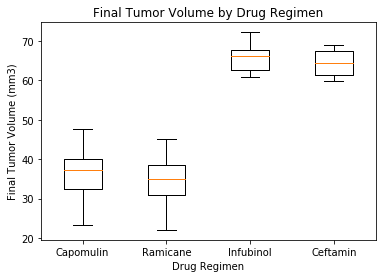

In [35]:
# BoxPlot

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(final_tumor_volume)
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()
    

# Two outcomes for boxplot activity section

Since the instructions for this activity were not clear and after a discussion with the instructor, we concluded that two outputs for the boxplot were possible. The first boxplot (please see above) based on the data filtered by the max time plot and the second boxplot (below), including all the time points.  

In [ ]:
# Filter the data frame by only four drugs (Capomulin, Ramicane, Infubinol, and Ceftamin)
four_drugs_data = merge_df_copy.loc[(merge_df_copy["Drug Regimen"] == "Capomulin") | (merge_df_copy["Drug Regimen"] == "Ceftamin")| (merge_df_copy["Drug Regimen"] == "Infubinol") | (merge_df_copy["Drug Regimen"] == "Ramicane")]
four_drugs_data= pd.DataFrame(four_drugs_data.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].mean()).reset_index()

In [ ]:
# Capomulin list
capomulin_complete_volume = four_drugs_data['Tumor Volume (mm3)'].loc[four_drugs_data["Drug Regimen"] == "Capomulin"]
capomulin_complete_list = capomulin_complete_volume.tolist()

In [ ]:
# Ramicane list
ramicane_complete_volume = four_drugs_data['Tumor Volume (mm3)'].loc[four_drugs_data["Drug Regimen"] == "Ramicane"]
ramicane_complete_list = ramicane_complete_volume.tolist()

In [ ]:
# Infubinol list
infubinol_complete_volume = four_drugs_data['Tumor Volume (mm3)'].loc[four_drugs_data["Drug Regimen"] == "Infubinol"]
infubinol_complete_list = infubinol_complete_volume.tolist()

In [ ]:
# Ceftamin list
ceftamin_complete_volume = four_drugs_data['Tumor Volume (mm3)'].loc[four_drugs_data["Drug Regimen"] == "Ceftamin"]
ceftamin_complete_list = ceftamin_complete_volume.tolist()

In [ ]:
# Store the list in one list
drug_list_complete = [capomulin_complete_list, ramicane_complete_list, infubinol_complete_list, ceftamin_complete_list]

In [ ]:
# Boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(drug_list_complete, 0, 'b', 3)
plt.xticks([1,2,3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

- Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
s185_records = merge_df_copy.loc[(merge_df_copy["Mouse ID"]== "s185") & (merge_df_copy["Drug Regimen"]== "Capomulin")]
s185_records

In [ ]:
s185_timepoint = s185_records[["Timepoint", "Tumor Volume (mm3)"]]
s185_timepoint = s185_timepoint.set_index("Timepoint")

In [ ]:
s185_chart = s185_timepoint.plot(kind="line", title = "Capomulin treatment of mouses s185", legend=True, c="seagreen", linewidth=3)
s185_chart.set_ylabel("Tumor Volume (mm3)")
s185_chart.set_xlabel("Timepoint(days)")
plt.tight_layout()

## Correlation and Regression

- Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

- Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [ ]:
# Create a data frame with capomulin treatment information

capomulin_treatment = merge_df_copy.loc[merge_df_copy["Drug Regimen"]=="Capomulin"]
capomulin_treatment

In [ ]:
# Group the data frame by Mouse ID
id_groups = capomulin_treatment.groupby("Mouse ID")

# Obtain the mean of the values
mean_capomulin = id_groups.mean()

In [ ]:
# Create the scatter plot

mean_scatter = mean_capomulin.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)", marker="o", c="blueviolet")
plt.tight_layout()
mean_scatter.set_ylabel("Average Tumor Volume (mm3)")


In [ ]:
# Correlation
weight = mean_capomulin["Weight (g)"]
tumor_volume_mm3 = mean_capomulin["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight , tumor_volume_mm3)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight , tumor_volume_mm3)
regression_values = weight * slope + intercept
mean_scatter = mean_capomulin.plot(kind='scatter', x="Weight (g)", y="Tumor Volume (mm3)", c="blueviolet")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
mean_scatter.set_ylabel("Average Tumor Volume (mm3)")
mean_scatter.plot(weight, regression_values, "g-")
plt.tight_layout()


In [ ]:
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq